# Centroid-Based Classification: Mini-Batch K-Means

Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cluster import MiniBatchKMeans

## Load data

In [2]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
X[:10]

array([[ 1.22515974, -0.95173116],
       [ 1.01630365, -1.72517506],
       [ 0.33534004, -1.7248955 ],
       [ 1.78634822, -1.78265314],
       [ 1.01675094,  1.06256946],
       [-1.51405201, -1.8110384 ],
       [ 0.84364975, -1.57914694],
       [ 0.65799375,  0.07621282],
       [ 1.24395165,  0.17407616],
       [ 1.34096685,  0.13010495]])

## Explore data

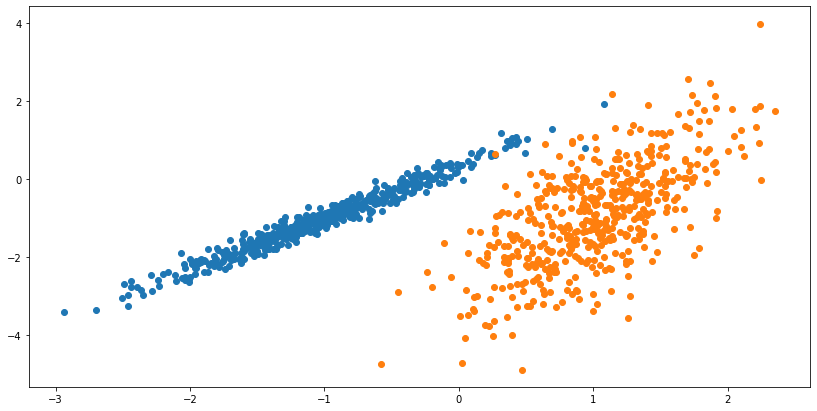

In [3]:
# create scatter plot for samples from each class
plt.figure(figsize=(14,7))

for class_value in range(2):
	# get row indexes for samples with this class
	row_idx = np.where(y == class_value)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()

## Train model

In [4]:
# define the model
model = MiniBatchKMeans(n_clusters=2)
# fit the model
model.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=2, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

## Create clusters

In [5]:
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = np.unique(yhat)

In [6]:
clusters

array([0, 1], dtype=int32)

## Plot clusters

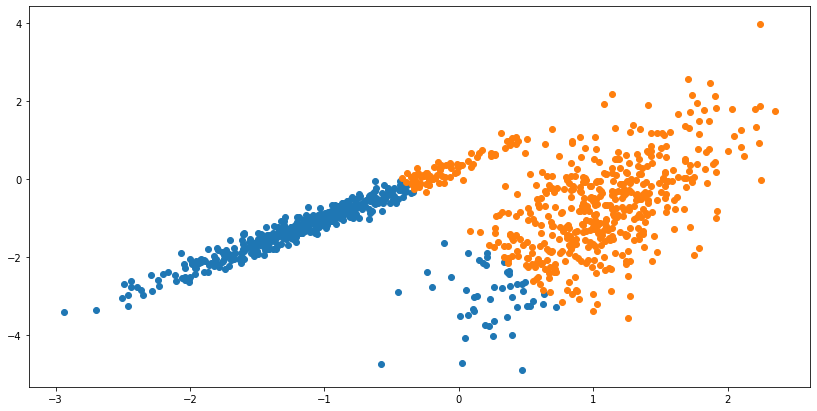

In [7]:
# create scatter plot for samples from each cluster
plt.figure(figsize=(14,7))

for cluster in clusters:
	# get row indexes for samples with this cluster
	row_idx = np.where(yhat == cluster)
	# create scatter of these samples
	plt.scatter(X[row_idx, 0], X[row_idx, 1])
# show the plot
plt.show()